In [1]:
# Libraries

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
tools.set_credentials_file(username='nishnash54', api_key='DfseeR1i0NeHSrP4Dohh')

import seaborn as sns

from datetime import datetime
from matplotlib_venn import venn2
from collections import Counter
from pprint import pprint

%matplotlib inline

In [2]:
# Dataset

print(os.listdir('./dataset'))

['campaign_data.csv', 'mongo_to_csv.py', '__pycache__', 'campaign_descirbe.md', 'devfest-registered.xlsx', 'devtalks_describe.md', 'registrations_describe.md', 'devfest.csv', 'devfest_describe.md', 'teams_describe.md', 'devtalks.csv', 'credentials.py', 'devfest-teams.xlsx']


## Campaign manager dataset
----
The campaign manager stores data in MongoDB. This data was extrated to a csv file for further processing and analysis.

In [3]:
# Campaign dataset

df = pd.read_csv('./dataset/campaign_data.csv')

print('Campaign')
print('Shape: ', df.shape)

Campaign
Shape:  (295, 18)


In [4]:
# Data head

df.head()

,fest_id,campaign_id,source,ip,city,country,countryCode,isp,lat,lon,org,query,region,regionName,status,timezone,zip,timestamp
0,0Zrk29JSlVqjkHeai0Hk,a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2,whatsapp,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 10:16:17
1,4X6wBWASnaFBtGj9LQoS,80692e9c-2c39-4c7e-97d4-a2060333ff17,Facebook,106.203.21.154,Chennai,India,IN,Bharti Airtel,13.0833,80.2833,Bharti Airtel,106.203.21.154,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 10:34:36
2,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 23:19:43
3,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 23:19:55
4,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,157.51.135.128,Chennai,India,IN,Jio,13.0833,80.2833,Jio,157.51.135.128,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 23:24:34


In [5]:
# Description

print('Columns')
print(df.columns)

Columns
Index(['fest_id', 'campaign_id', 'source', 'ip', 'city', 'country',
       'countryCode', 'isp', 'lat', 'lon', 'org', 'query', 'region',
       'regionName', 'status', 'timezone', 'zip', 'timestamp'],
      dtype='object')


#### Column - fest_id
Each unique event is known as a fest. Each fest can have a number of campaign under it.

In [6]:
# Column - fest_id

print('fest_id')
print('Unique value count: ', df['fest_id'].nunique())
print('Unique values: ', df['fest_id'].unique())

fest_id
Unique value count:  3
Unique values:  ['0Zrk29JSlVqjkHeai0Hk' '4X6wBWASnaFBtGj9LQoS' 'UItdaK1sPQXSOA7BwjC0']


Counter({'UItdaK1sPQXSOA7BwjC0': 293,
         '0Zrk29JSlVqjkHeai0Hk': 1,
         '4X6wBWASnaFBtGj9LQoS': 1})


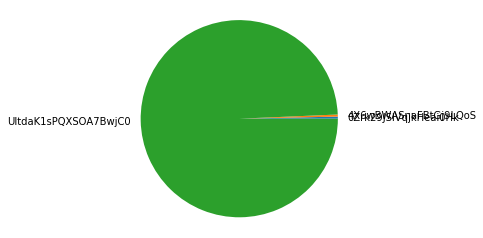

In [7]:
# Count plot - fest_id

count = Counter(df['fest_id'])
pprint(count)

label = []
size = []

for lab in count.keys():
    label.append(lab)
    size.append(count[lab])

plt.pie(size, labels=label)
plt.axis('equal')
plt.show()

#### Column - campaign_id
A campaign is short for an online pubicity or marketing campaign. A campaign can have various outreach programs such as through Whatsapp, Facebook,LinkedIn etc.

In [8]:
# Column - campaign_id

print('campaign_id')
print('Uniuqe value count: ', df['campaign_id'].nunique())
print('Unique values: ', df['campaign_id'].unique())

campaign_id
Uniuqe value count:  4
Unique values:  ['a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2'
 '80692e9c-2c39-4c7e-97d4-a2060333ff17'
 '1cc44a4d-40c4-4b53-abce-0ff105405905'
 'a2e19bdc-73db-4dc9-899a-3bc5b86f4009']


Counter({'1cc44a4d-40c4-4b53-abce-0ff105405905': 176,
         'a2e19bdc-73db-4dc9-899a-3bc5b86f4009': 117,
         'a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2': 1,
         '80692e9c-2c39-4c7e-97d4-a2060333ff17': 1})


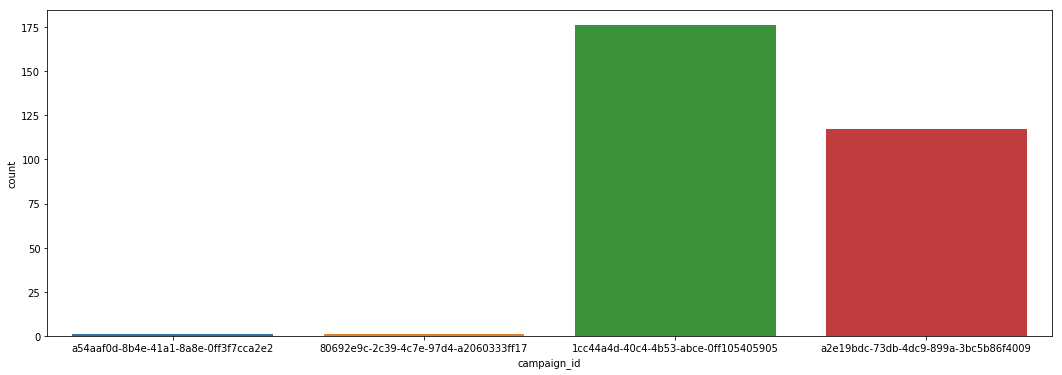

In [9]:
# Count plot - campaign_id

count = Counter(df['campaign_id'])
pprint(count)

fig= plt.figure(figsize=(18,6))

sns.countplot(df['campaign_id'])
plt.show()

#### Column - source
Source classifies the type of outreach used for the marketing, i.e. Whatsapp, Facebook etc.

In [10]:
# Column - source

print('source')
print('Unique value count: ', df['source'].nunique())
print('Unique values: ', df['source'].unique())

source
Unique value count:  4
Unique values:  ['whatsapp' 'Facebook' 'Email' 'LinkedIn']


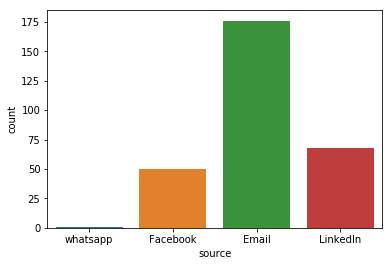

In [11]:
# Count plot - source

sns.countplot(df['source'])
plt.show()

In [12]:
# Column - ip

print('ip')
print('Unique value count: ', df['ip'].nunique())

ip
Unique value count:  213


#### Column - country
Classifies the conrty the user was present in during when the link was opened.

In [13]:
# Column - country

print('country')
print('Unique value count: ', df['country'].nunique())
print('Unique values: ', df['country'].unique())


count = Counter(df['country'])
pprint(count)

country
Unique value count:  9
Unique values:  ['India' 'United States' 'United Arab Emirates' 'China' 'United Kingdom'
 'Argentina' 'Republic of Lithuania' 'Peru' 'Germany']
Counter({'India': 279,
         'United States': 6,
         'Germany': 3,
         'United Arab Emirates': 2,
         'China': 1,
         'United Kingdom': 1,
         'Argentina': 1,
         'Republic of Lithuania': 1,
         'Peru': 1})


In [14]:
# Column - countryCode

count = Counter(df['countryCode'])
pprint(count)

Counter({'IN': 279,
         'US': 6,
         'DE': 3,
         'AE': 2,
         'CN': 1,
         'GB': 1,
         'AR': 1,
         'LT': 1,
         'PE': 1})


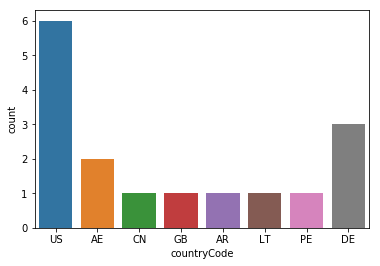

In [15]:
# Count plot - countryCode

sns.countplot(df[df['countryCode'] != 'IN']['countryCode'])
plt.show()

In [16]:
# Column - isp

print('isp')
print('Unique value count: ', df['isp'].nunique())

isp
Unique value count:  36


In [17]:
# Column - lat and lon

print('lat')
print('Unique value count: ', df['lat'].nunique())

print('lon')
print('Unique value count: ', df['lon'].nunique())

lat
Unique value count:  62
lon
Unique value count:  60


In [18]:
# Column - org

print('org')
print('Unique value count: ', df['org'].nunique())

org
Unique value count:  34


In [19]:
# Column - region

print('region')
print('Unique value count: ', df['region'].nunique())

region
Unique value count:  27


In [20]:
# Column - regionName

print('regionName')
print('Unique value count: ', df['regionName'].nunique())

regionName
Unique value count:  29


In [21]:
# Column - zip

print('zip')
print('Unique value count: ', df['zip'].nunique())

zip
Unique value count:  79


#### Column - timestamp
The timestamp column is one fo the most important data fields. It records the time at which the user hit the link. This data enables us to imporove our marketing camapigns as send out information at the rigth time to catch the users attention.

In [22]:
# Column - timestamp

print('timestamp')
print('Sample: ', df['timestamp'][0])

timestamp
Sample:  2018-09-12 10:16:17


In [23]:
# Convert str to datetime
# Parameters: 
# data - String data format
# Return:
# datetime object

def convert_to_datetime(data):
    return datetime.strptime(data[:-3], '%Y-%m-%d %H:%M')

In [24]:
# Type conversion to datatime

print('Type of timestamp: ', type(df['timestamp'][0]))
print('Sample: ', df['timestamp'][0])

print('\nConverting...\n')
df['timestamp'] = df['timestamp'].apply(convert_to_datetime)

print('Type of timestamp: ', type(df['timestamp'][0]))
print('Sample: ', df['timestamp'][0])

Type of timestamp:  <class 'str'>
Sample:  2018-09-12 10:16:17

Converting...

Type of timestamp:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Sample:  2018-09-12 10:16:00


In [25]:
# Splitting datetime into date and time

df['date'] = [d.date() for d in df['timestamp']]
df['time'] = [d.time() for d in df['timestamp']]

df.head(2)

,fest_id,campaign_id,source,ip,city,country,countryCode,isp,lat,lon,org,query,region,regionName,status,timezone,zip,timestamp,date,time
0,0Zrk29JSlVqjkHeai0Hk,a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2,whatsapp,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 10:16:00,2018-09-12,10:16:00
1,4X6wBWASnaFBtGj9LQoS,80692e9c-2c39-4c7e-97d4-a2060333ff17,Facebook,106.203.21.154,Chennai,India,IN,Bharti Airtel,13.0833,80.2833,Bharti Airtel,106.203.21.154,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 10:34:00,2018-09-12,10:34:00


In [26]:
# Group by date

day_count = df.groupby(['date'])['timestamp'].count()

print('Day count')
print(day_count[:5])

Day count
date
2018-09-12      6
2018-09-13    113
2018-09-14     25
2018-09-15     10
2018-09-16     34
Name: timestamp, dtype: int64


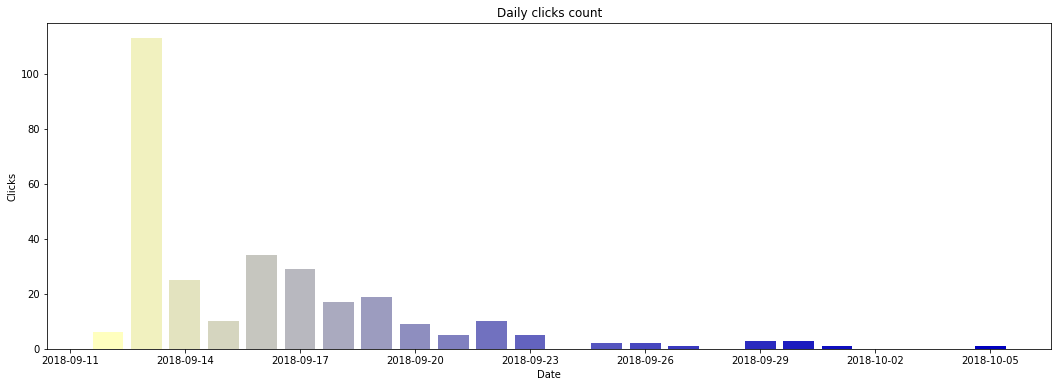

In [27]:
# Day wise registrations plot

fig= plt.figure(figsize=(18,6))

days = list(day_count.keys())
colors = [(x, x, 0.75) for x in [i for i in np.linspace(1,0,len(days))]]

plt.bar(days, day_count, color=colors)
plt.title('Daily clicks count')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

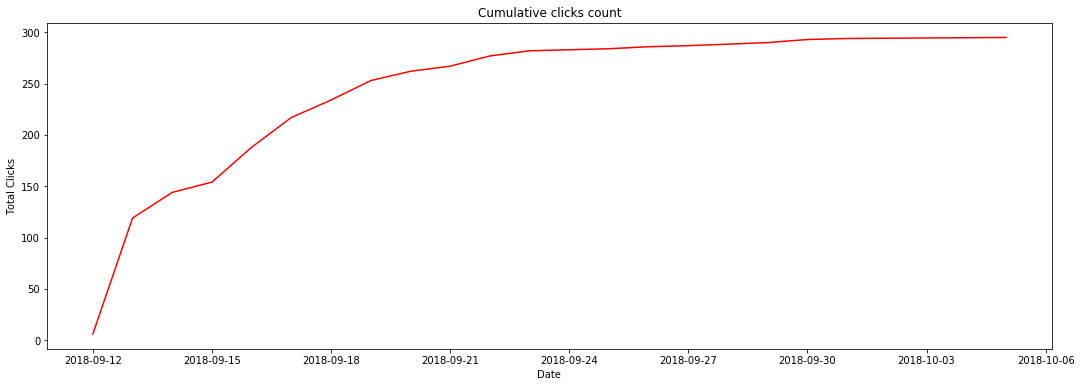

In [28]:
# Day wise total registrations plot

fig= plt.figure(figsize=(18,6))

plt.plot(days, np.array(day_count).cumsum(), 'red')
plt.title('Cumulative clicks count')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.show()

In [29]:
# Geolocation of the clicks
# Plotting latitude and longitude data on a world map
# This gives us a better understanding of where the campaigns have reached

data = [ dict(
        type = 'scattergeo',
        lon = df['lon'],
        lat = df['lat'],
        text = df['city'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
        ))]

layout = dict(
        title = 'Location wise clicks',
        colorbar = True,
        geo = dict(
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout)
py.plot(fig, validate=False)

'https://plot.ly/~nishnash54/4'